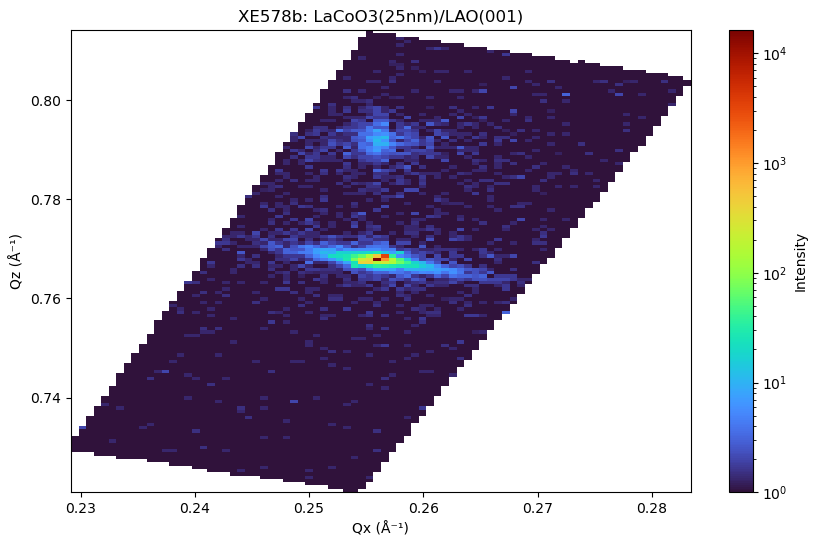

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

# Define the X-ray wavelength (in Ångströms)
wavelength = 1.5406  # Adjust this value based on your setup

# Load CSV file, skipping the first 34 rows
file_path = "/Users/danielrussell/Downloads/XE578b_RSM_103_9channel_0D.csv"  # Replace with the path to your CSV file
data = pd.read_csv(file_path, skiprows=34, header=None)  # Read without assuming column names

# Extract columns by their index
two_theta = data.iloc[:, 0]  # 2Theta (degrees)
omega = data.iloc[:, 1]      # Omega (degrees)
intensity = data.iloc[:, 2] + 1  # Intensity with +1 to avoid log issues

# Convert degrees to radians
theta_rad = np.radians(two_theta / 2)  # 2Theta to Theta in radians
omega_rad = np.radians(omega)

# Calculate Qz and Qx
k = 1 / wavelength
Qx = k * (np.cos(omega_rad)-np.cos(2*theta_rad - omega_rad))
Qz = k * (np.sin(omega_rad)+np.sin(2*theta_rad - omega_rad))

# Add Qz, Qx, and Intensity to the DataFrame
data['Qz'] = Qz
data['Qx'] = Qx
data['Intensity'] = intensity

# Debug: Print the first few rows of the DataFrame
#print("DataFrame before pivoting:")
#print(data.head())

# Bin Qz and Qx for a manageable pivot table
bin_size = 0.00067  # Adjust bin size as needed
data['Qz'] = (data['Qz'] // bin_size) * bin_size  # Bin Qz
data['Qx'] = (data['Qx'] // bin_size) * bin_size  # Bin Qx

# Create a pivot table for heatmap
pivot_table = pd.pivot_table(
    data,
    values='Intensity',  # Intensity column
    index='Qz',          # Qz for y-axis
    columns='Qx'         # Qx for x-axis
)

# Debug: Check if pivot_table is properly created
#print("Pivot table structure:")
#print(pivot_table)

# Fill NaN values in the pivot table with a small positive value
#pivot_table = pivot_table.fillna(1e-5)

# Create the plot
plt.figure(figsize=(10, 6))
plt.imshow(
    pivot_table,
    aspect='auto',
    cmap='turbo',
    origin='lower',
    extent=[
        pivot_table.columns.min(),
        pivot_table.columns.max(),
        pivot_table.index.min(),
        pivot_table.index.max()
    ],
    norm=LogNorm(vmin=pivot_table.min().min(), vmax=pivot_table.max().max())  # Log scale normalization
)
plt.colorbar(label='Intensity')
plt.xlabel('Qx (Å⁻¹)')
plt.ylabel('Qz (Å⁻¹)')
plt.title('XE578b: LaCoO3(25nm)/LAO(001)')
#plt.savefig('/Users/danielrussell/Downloads/XE529c_RSM_103_inverse_ang.png', dpi=300, bbox_inches='tight')
plt.show()



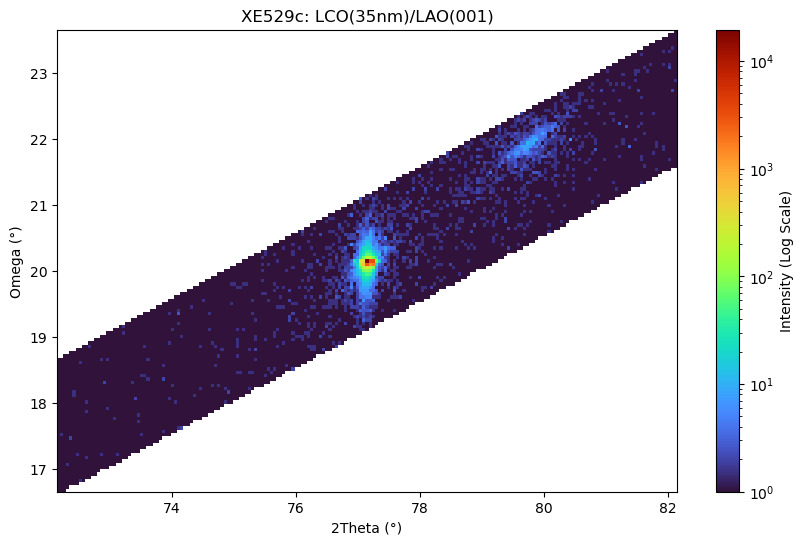

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

# Load CSV file, skipping the first 34 rows
file_path = "/Users/danielrussell/Downloads/XE578b_RSM_103_9channel_0D.csv"  # Replace with the path to your CSV file
data = pd.read_csv(file_path, skiprows=34, header=None)  # Read without assuming column names

# Extract columns by their index
two_theta = data.iloc[:, 0]  # 2Theta (degrees)
omega = data.iloc[:, 1]      # Omega (degrees)
intensity = data.iloc[:, 2] + 1  # Intensity with +1 to avoid log issues

# Add the data to the DataFrame for pivoting
data['2Theta'] = two_theta
data['Omega'] = omega
data[2] = intensity  # Reassign the intensity column to 2 for clarity
data.rename(columns={2: 'Intensity'}, inplace=True)  # Rename column 2 to 'Intensity'

# Debug: Print the first few rows of the DataFrame to check
#print("DataFrame before pivoting:")
#print(data.head())

# Bin 2Theta and Omega for a manageable pivot table
bin_size = 0.05  # Adjust bin size as needed
data['2Theta'] = (data['2Theta'] // bin_size) * bin_size  # Bin 2Theta
data['Omega'] = (data['Omega'] // bin_size) * bin_size  # Bin Omega

# Create a pivot table for heatmap (swap 2Theta and Omega axes)
pivot_table = pd.pivot_table(
    data,
    values='Intensity',  # Intensity column
    index='Omega',       # Omega for y-axis
    columns='2Theta'     # 2Theta for x-axis
)

# Debug: Check if pivot_table is properly created
#print("Pivot table structure:")
#print(pivot_table)

# Fill NaN values in the pivot table with a small positive value
#pivot_table = pivot_table.fillna(1e-5)

# Create the plot
plt.figure(figsize=(10, 6))
plt.imshow(
    pivot_table,
    aspect='auto',
    cmap='turbo',
    origin='lower',
    extent=[
        pivot_table.columns.min(),
        pivot_table.columns.max(),
        pivot_table.index.min(),
        pivot_table.index.max()
    ],
    norm=LogNorm(vmin=pivot_table.min().min(), vmax=pivot_table.max().max())  # Log scale normalization
)
plt.colorbar(label='Intensity (Log Scale)')
plt.xlabel('2Theta (°)')
plt.ylabel('Omega (°)')
plt.title('XE529c: LCO(35nm)/LAO(001)')
plt.show()
